In [1]:
#The main error is because of the format of the date, which you have to mention separetly when its mixed.
#Now the predictions are coming. Find the proper pdq value and do the rest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
tsd=pd.read_csv('V:\DS_C\Time_Series\quiz\MaunaLoaDailyTemps-1.csv')

In [4]:
tsd.head(20)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
5,1/6/2014,22.0,39.0,31.0,658,1759
6,1/7/2014,28.0,45.0,37.0,658,1759
7,1/8/2014,30.0,41.0,36.0,659,1800
8,1/9/2014,29.0,42.0,36.0,659,1801
9,1/10/2014,30.0,47.0,39.0,659,1801


In [5]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [6]:
#converting the data type of date column
tsd['DATE']=pd.to_datetime(tsd['DATE'],format="%m/%d/%Y")
tsd

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,2018-12-26,35.0,45.0,40.0,654,1752
1821,2018-12-27,33.0,44.0,39.0,655,1752
1822,2018-12-28,33.0,47.0,40.0,655,1753
1823,2018-12-29,36.0,47.0,42.0,655,1753


In [7]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


In [8]:
tsd.isnull().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [9]:
#setting date time column as the index value
tsd.set_index('DATE',inplace=True)

In [10]:
tsd

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


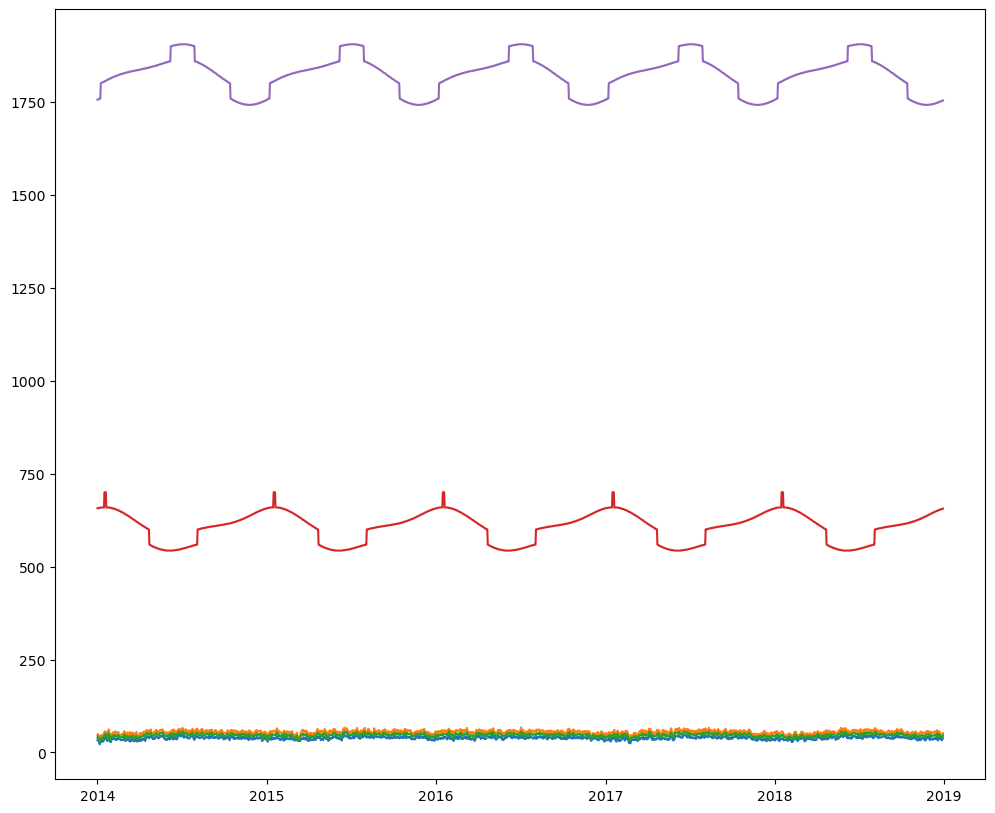

In [11]:
plt.figure(figsize=(12,10))
plt.plot(tsd)

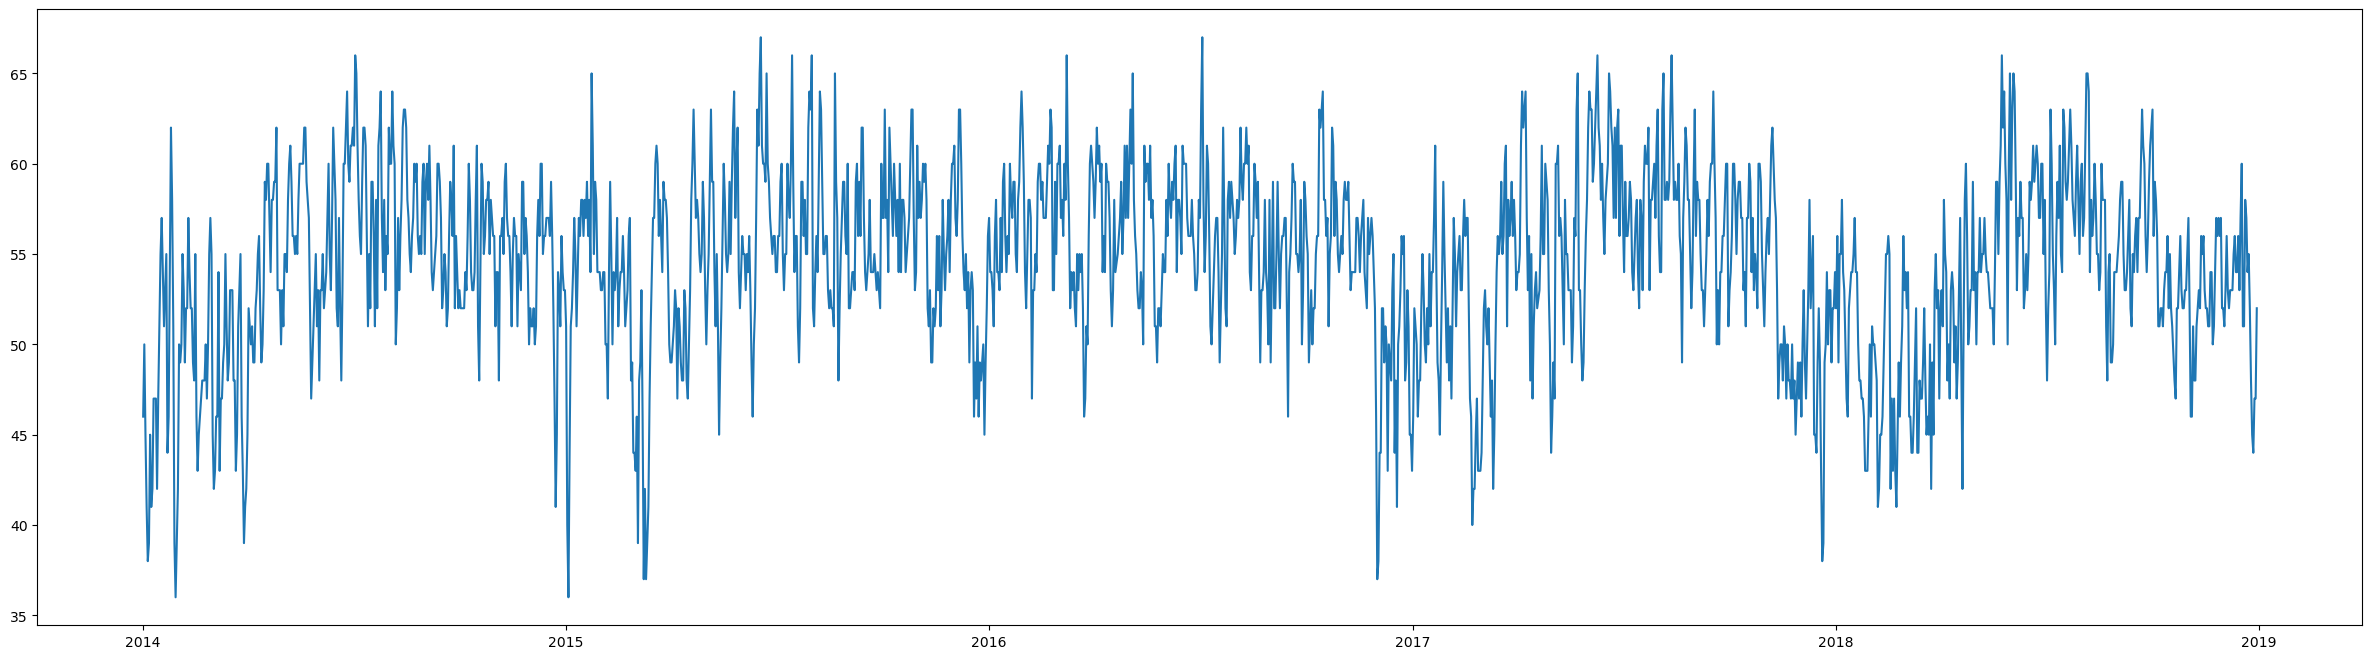

In [67]:
plt.figure(figsize=(30,8))
plt.plot(tsd['MaxTemp'])

In [13]:
tsd=tsd.interpolate(method='linear')

# tsd.dropna(inplace=True)

In [14]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1825 non-null   float64
 1   MaxTemp  1825 non-null   float64
 2   AvgTemp  1825 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [15]:
tsd.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


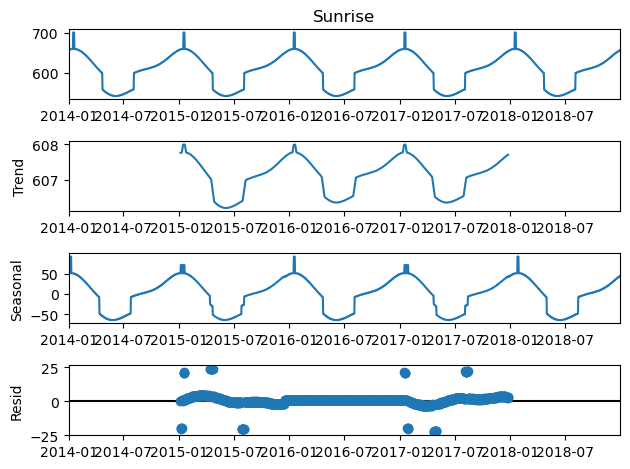

In [84]:
decomposition=seasonal_decompose(tsd['Sunrise'],two_sided=True,period=740)
print(decomposition.plot())

In [64]:
from statsmodels.tsa.stattools import adfuller

In [85]:
final_resp=adfuller(tsd['Sunrise'])

In [86]:
#P value < 0.05 data is stationary
# if P value >0.05 data is non stationary
final_resp
#hence data is stationary

(-3.2074633593095845,
 0.01955671484960257,
 17,
 1807,
 {'1%': -3.4339740253219566,
  '5%': -2.863140805408186,
  '10%': -2.5676222161097058},
 10153.104413621066)

In [21]:
#q1
q1=tsd['AvgTemp']>50

In [22]:
q1.sum()

332

In [23]:
q1

DATE
2014-01-01    False
2014-01-02    False
2014-01-03    False
2014-01-04    False
2014-01-05    False
              ...  
2018-12-26    False
2018-12-27    False
2018-12-28    False
2018-12-29    False
2018-12-30    False
Name: AvgTemp, Length: 1825, dtype: bool

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
tsd_avgt=tsd['Sunrise']
tsd_avgt

DATE
2014-01-01    657
2014-01-02    657
2014-01-03    657
2014-01-04    658
2014-01-05    658
             ... 
2018-12-26    654
2018-12-27    655
2018-12-28    655
2018-12-29    655
2018-12-30    656
Name: Sunrise, Length: 1825, dtype: int64

In [91]:
tsd_avgt.info()
tsd_avgt

<class 'pandas.core.series.Series'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Series name: Sunrise
Non-Null Count  Dtype
--------------  -----
1825 non-null   int64
dtypes: int64(1)
memory usage: 28.5 KB


DATE
2014-01-01    657
2014-01-02    657
2014-01-03    657
2014-01-04    658
2014-01-05    658
             ... 
2018-12-26    654
2018-12-27    655
2018-12-28    655
2018-12-29    655
2018-12-30    656
Name: Sunrise, Length: 1825, dtype: int64

In [92]:
#Converting the data to a univariate data as ARIMA is Univariate model, which results in a series
#Further it is concerted to a dataframe to the model
tsd_avg=pd.DataFrame({'DATE':tsd_avgt.index,'Sunrise':tsd_avgt.values})
tsd_avg

,DATE,Sunrise
0,2014-01-01,657
1,2014-01-02,657
2,2014-01-03,657
3,2014-01-04,658
4,2014-01-05,658
...,...,...
1820,2018-12-26,654
1821,2018-12-27,655
1822,2018-12-28,655
1823,2018-12-29,655


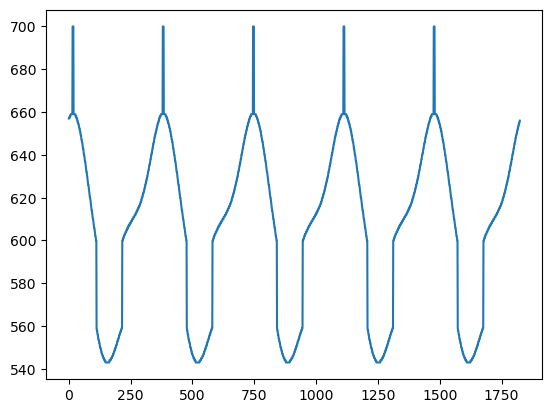

In [94]:
plt.plot(tsd_avg['Sunrise'])

In [96]:
#tsd_avg
tsd_avg.set_index('DATE',inplace=True)


In [97]:
tsd_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Sunrise  1825 non-null   int64
dtypes: int64(1)
memory usage: 28.5 KB


In [98]:
train=tsd_avg.iloc[:1200,:]
test=tsd_avg.iloc[1200:,:]
train , test

(            Sunrise
 DATE               
 2014-01-01      657
 2014-01-02      657
 2014-01-03      657
 2014-01-04      658
 2014-01-05      658
 ...             ...
 2017-04-10      609
 2017-04-11      608
 2017-04-12      607
 2017-04-13      606
 2017-04-14      606
 
 [1200 rows x 1 columns],
             Sunrise
 DATE               
 2017-04-15      605
 2017-04-16      604
 2017-04-17      603
 2017-04-18      602
 2017-04-19      602
 ...             ...
 2018-12-26      654
 2018-12-27      655
 2018-12-28      655
 2018-12-29      655
 2018-12-30      656
 
 [625 rows x 1 columns])

In [99]:
model=ARIMA(train, order=(0,0,6))
x=model.fit()
tsd_avg['Predict']=x.predict(start=len(train),end=len(train)+len(test)-1)
tsd_avg

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Sunrise,Predict
DATE,,
2014-01-01,657,NaN
2014-01-02,657,NaN
2014-01-03,657,NaN
2014-01-04,658,NaN
2014-01-05,658,NaN
...,...,...
2018-12-26,654,610.234
2018-12-27,655,610.234
2018-12-28,655,610.234


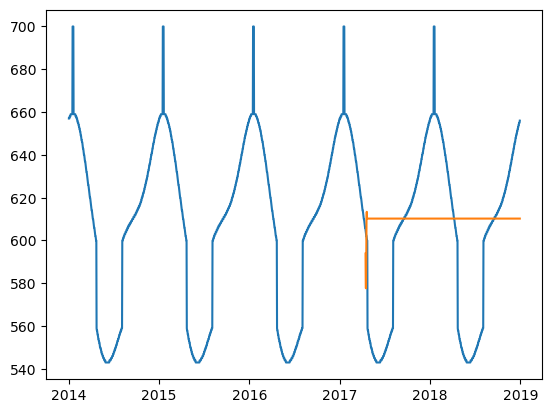

In [100]:
plt.plot(tsd_avg)

In [34]:
len(train)

1200

In [35]:
len(test)

625

In [36]:
len(train)+len(test)-1

1824

In [101]:
import itertools

In [102]:
p=range(8)
d=range(1)
q=range(8)

In [103]:
y=list(itertools.product(p,d,q))
y

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3),
 (5, 0, 4),
 (5, 0, 5),
 (5, 0, 6),
 (5, 0, 7),
 (6, 0, 0),
 (6, 0, 1),
 (6, 0, 2),
 (6, 0, 3),
 (6, 0, 4),
 (6, 0, 5),
 (6, 0, 6),
 (6, 0, 7),
 (7, 0, 0),
 (7, 0, 1),
 (7, 0, 2),
 (7, 0, 3),
 (7, 0, 4),
 (7, 0, 5),
 (7, 0, 6),
 (7, 0, 7)]

In [104]:
len(y)

64

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
rmse = []
order = []
for i in y:
    model = ARIMA(train, order =i)  # order = (P,D,Q)
    model_fit = model.fit()
    pred = model_fit.predict(start= len(train), end= len(train)+len(test)-1 )
    error = np.sqrt(mean_squared_error(test,pred))
    order.append(i)ca
    rmse.append(error)

result_new = pd.DataFrame(index=order,data=rmse,columns = ['rmse'])
result_new



C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D w

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D w

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,rmse
"(0, 0, 0)",41.258467
"(0, 0, 1)",41.264108
"(0, 0, 2)",41.260282
"(0, 0, 3)",41.256853
"(0, 0, 4)",41.259236
...,...
"(7, 0, 3)",40.660516
"(7, 0, 4)",40.661951
"(7, 0, 5)",40.670160
"(7, 0, 6)",40.661681


In [107]:
result_new.sort_values('rmse')

,rmse
"(3, 0, 7)",17.085942
"(2, 0, 5)",17.746497
"(3, 0, 6)",18.991371
"(4, 0, 6)",20.377649
"(4, 0, 7)",22.337311
...,...
"(0, 0, 2)",41.260282
"(0, 0, 1)",41.264108
"(0, 0, 6)",41.285755
"(0, 0, 5)",41.289356


In [108]:
model=ARIMA(train, order=(3,0,7))
x=model.fit()
tsd_avg['Predict']=x.predict(start=len(train),end=len(train)+len(test)-1)
tsd_avg

C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mukhu\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Sunrise,Predict
DATE,,
2014-01-01,657,NaN
2014-01-02,657,NaN
2014-01-03,657,NaN
2014-01-04,658,NaN
2014-01-05,658,NaN
...,...,...
2018-12-26,654,641.930751
2018-12-27,655,641.735262
2018-12-28,655,641.528820


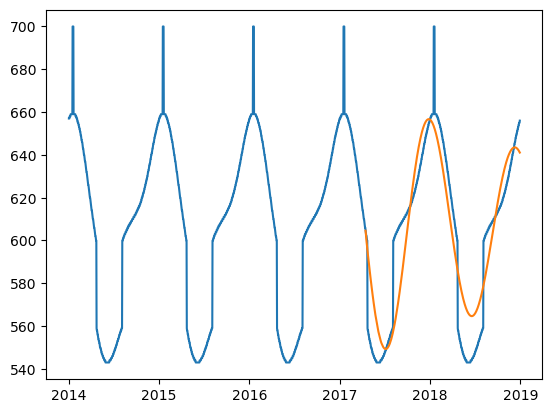

In [109]:
plt.plot(tsd_avg)

<Axes: xlabel='DATE'>

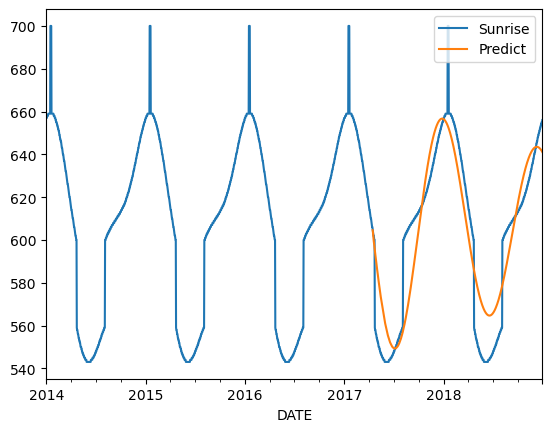

In [111]:
tsd_avg[['Sunrise','Predict']].plot()